In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('spam.tsv',sep='\t')

In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
df.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [ ]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [ ]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [ ]:
df['label'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

as we can see that ham data clearly overpowers the spam data we will try to make both datas comparable so that there is no biases in terms of numbers and model classifies purely based on content

In [ ]:
ham=df[df['label']=='ham']
spam=df[df['label']=='spam']

In [ ]:
spam.shape

(747, 4)

In [ ]:
ham.shape

(4825, 4)

In [ ]:
ham=ham.sample(spam.shape[0])

In [ ]:
ham.shape

(747, 4)

In [ ]:
data=ham.append(spam,ignore_index=True)

In [ ]:
data.shape

(1494, 4)

In [ ]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [ ]:
data.head()

,label,message,length,punct
0,ham,Are you up for the challenge? I know i am :),44,3
1,ham,Pls accept me for one day. Or am begging you c...,63,2
2,ham,Does daddy have a bb now.,25,1
3,ham,Hey. What happened? U switch off ur cell d who...,112,6
4,ham,I don't run away frm u... I walk slowly &amp; ...,96,10


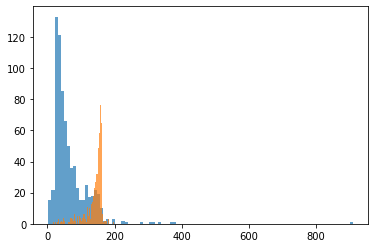

In [ ]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

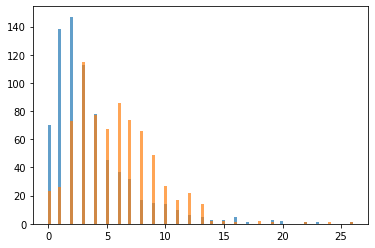

In [ ]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

#Splitting into test and train data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(data['message'],data['label'],test_size=0.3,random_state=0,shuffle=True)

#Building Random Forest Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
classifier= Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier(n_estimators=100))])

In [ ]:
classifier.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

#Predicting the output for test data by the help of already fit data

In [ ]:
Y_pred=classifier.predict(X_test)

In [ ]:
Y_pred, Y_test

(array(['spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam', 'ham',
        'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'spam', 'ham',
        'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam', 'spam', 'spam',
        'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham',
        'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'ham',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham',
        'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
        'spam', 'ham', 'spam',

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
accuracy_score(Y_test,Y_pred)

0.9599109131403119

In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[227,   0],
       [ 18, 204]])

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96       227
        spam       1.00      0.92      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



#Building SVM Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm=Pipeline([("tfidf",TfidfVectorizer()),("classifier",SVC(C=100,gamma='auto'))])

In [ ]:
svm.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

#Predicting using SVM Model

In [ ]:
Y_predict=svm.predict(X_test)

In [ ]:
accuracy_score(Y_test,Y_predict)

0.9576837416481069

In [ ]:
confusion_matrix(Y_test,Y_predict)

array([[223,   4],
       [ 15, 207]])

In [ ]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

         ham       0.94      0.98      0.96       227
        spam       0.98      0.93      0.96       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



#Testing both the models on random input

In [ ]:
test1=['Hello you are learning Natural Language Processing']
test2=['Hope you are doing good and enjoying']
test3=['Congratulations! You have won a lottery worth a 1 million dollar call on 123456 to redeem']

In [ ]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


In [ ]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
